In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('green_tech_data.csv')

In [ ]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


sustainability
0    85
1    15
Name: count, dtype: int64


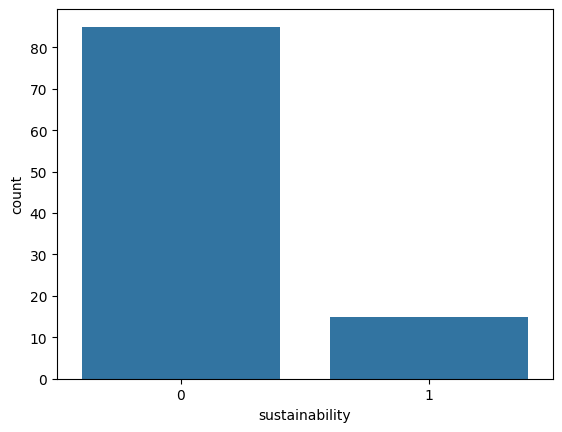

In [ ]:
# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

In [ ]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


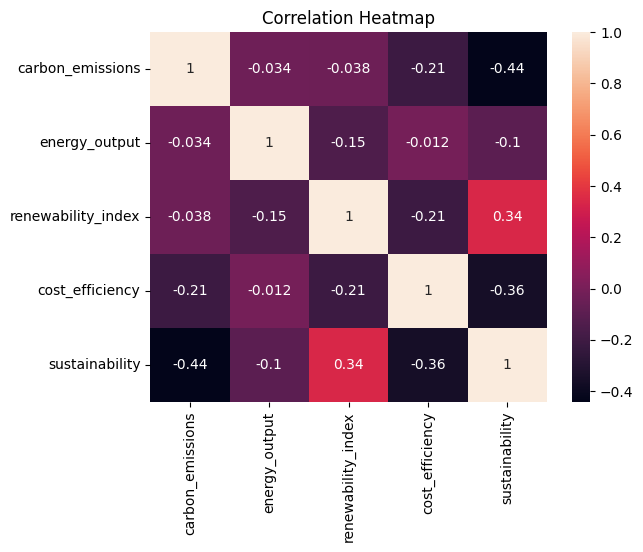

In [ ]:
sns.heatmap(data = data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency
49,114.699059,350.781818,0.853009,3.316370
34,387.971212,948.618734,0.195243,0.707012
7,353.161651,779.996025,0.663502,1.953304
95,222.828459,414.288617,0.522243,4.688408
27,229.982053,874.657525,0.393098,3.252743


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


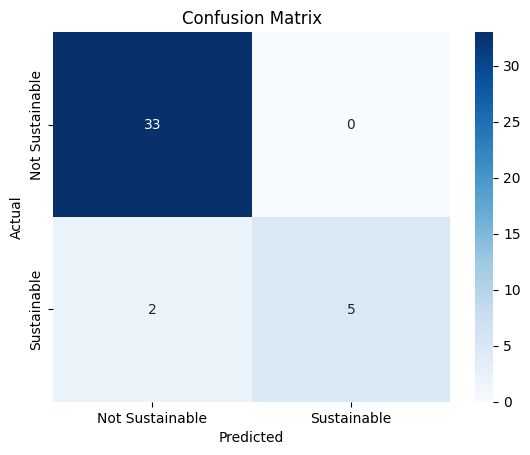

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable','Sustainable'],
            yticklabels=['Not Sustainable','Sustainable'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [ ]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['coefficient'])
print(coefficients)

                    coefficient
carbon_emissions      -0.017525
energy_output         -0.000343
renewability_index     0.698158
cost_efficiency       -1.205272


In [44]:
import joblib
joblib.dump(model, 'Irmodel_Sustainable.pkl')

['Irmodel_Sustainable.pkl']

In [48]:
new_data = pd.DataFrame({
    'carbon_emissions': [10],
    'energy_output': [11],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]

})

predictions = model.predict(new_data)
print(f"Prediction: {predictions[0]}")


probabilities = model.predict_proba(new_data)
print(f"Probabilities: {probabilities}")

Prediction: 1
Probabilities: [[0.03270564 0.96729436]]
